In [16]:
import pandas as pd 


In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [18]:
df=pd.read_csv('weight-height.csv')

In [19]:
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Relationship between weight and Height')

Text(0.5, 1.0, 'Relationship between weight and Height')

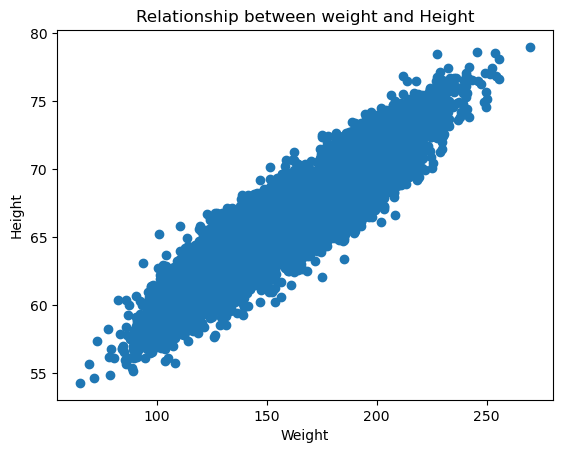

In [21]:
plt.show()

In [ ]:
#correlation
df[['Weight', 'Height']].corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


In [26]:
import seaborn as sns 
sns.pairplot(df, vars=['Weight', 'Height'])

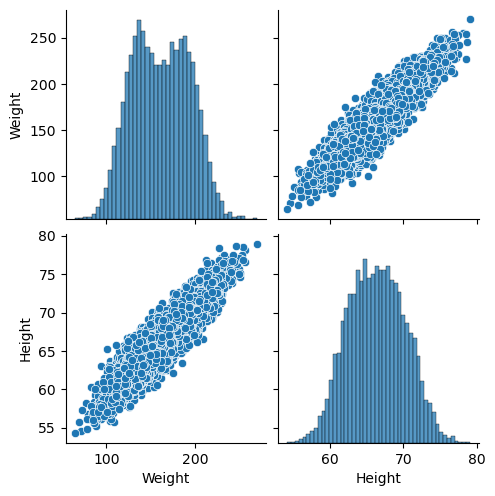

In [ ]:
plt.show()
#positively correlated increase in x => increase in y.

In [33]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
x=df['Weight']
x
#series

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [37]:
type(x)

pandas.core.series.Series

In [38]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
y=df['Height']
y
#serie of height 

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [ ]:
x=df[['Weight']]
type(x)
#weight is independent feature here so it should be dataframe or 2dimensional.

pandas.core.frame.DataFrame

In [42]:
x

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
9995,136.777454
9996,170.867906
9997,128.475319
9998,163.852461


In [ ]:
np.array(x).shape
#clearly,weight are in 2d

(10000, 1)

In [51]:
y=df['Height']
#height is dependent. it could be series or 1d

In [52]:
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [53]:
#Train Test split
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)
#tes_data_size=25% , random_state=

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler


In [59]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)

In [60]:
x_test=scaler.transform(X_test)

#apply ml algo: linear regression


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
regression=LinearRegression()

In [66]:
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
regression.coef_
#y-Bo=B1*x1
#B1=3.56030394
#coeff or slope 
#one unit movement in x axis lead to 3.5603 movement in y axis.

array([3.56030394])

In [ ]:
regression.intercept_
#

np.float64(66.33437397792419)

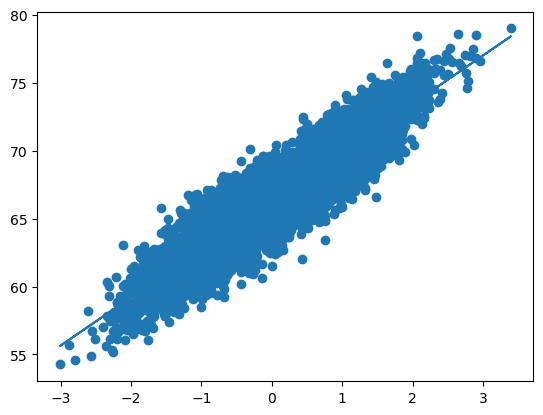

In [73]:
#plot training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))
plt.show()

In [77]:
#prediction for test data 
#y_predict=intercept + coefficient(weights)
# y_predict=66.33 + 3.56(weights)
y_predict=regression.predict(x_test)

In [81]:
#perfomance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_absolute_error(y_test, y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

1.1561662933885422
1.1561662933885422
1.075251734892133


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
score 

0.8570843827366493

In [87]:
import statsmodels.api as sm 
model=sm.OLS(y_train,x_train).fit()
prediction=model.predict(x_test)
prediction

array([ 1.32917978,  3.77793419,  1.00724829, ..., -3.74364583,
       -3.32856822, -2.48221761])

In [89]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              19.29
Date:                Tue, 10 Feb 2026   Prob (F-statistic):                    1.14e-05
Time:                        22:01:44   Log-Likelihood:                         -37613.
No. Observations:                6700   AIC:                                  7.523e+04
Df Residuals:                    6699   BIC:                                  7.523e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

prediction for new data

In [91]:
regression.predict(scaler.transform([[70]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56.21010764])